
## Real estate data cleaning with Pandas for efficient analysis

This is a real dataset that was downloaded using web scraping techniques. The data contains records from Fotocasa, one of the most popular real estate websites in Spain. Please do not perform web scraping unless it is for academic purposes.

The dataset was downloaded a few years ago by Henry Navarro, and no economic benefit was obtained from it.

It contains thousands of real house listings published on the website www.fotocasa.com. Your goal is to extract as much information as possible with the data science knowledge you have acquired so far.

Let's get started!

- First, let's read and explore the dataset.



In [45]:
# step 0. load libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
# step 1. load data
df_raw = pd.read_csv("../real_estate.csv",sep=";")
df_raw.sample(10)






,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,...,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone
5150,5151,153208436,False,gilmar salamanca,912788069.0,https://www.fotocasa.es/es/comprar/vivienda/el...,3.0,2.0,112.0,550000,...,0,0,0,0,0,0,"40,4241","-3,68146",NaN,NaN
11351,11352,151003792,False,prorealty inmobiliaria,912664437.0,https://www.fotocasa.es/es/comprar/vivienda/gr...,4.0,5.0,368.0,490000,...,0,0,0,0,0,0,"40,5583829","-3,9004199",NaN,NaN
1264,1265,150510204,False,jaime valcarce consulting inmobiliario,912178249.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,4.0,5.0,1000.0,2495000,...,0,0,0,0,0,0,"40,5056514213562","-3,63125857864376",NaN,NaN
5059,5060,153231304,False,remax alma,911794037.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,4.0,2.0,107.0,320000,...,0,0,0,0,0,1,"40,35071","-3,53027",NaN,NaN
6773,6774,153984312,False,solvia inmobiliaria,932933810.0,https://www.fotocasa.es/es/comprar/vivienda/sa...,3.0,2.0,90.0,317500,...,0,0,0,0,0,1,"40,4980556","-3,3755556",NaN,NaN
10459,10460,147634605,False,globalpiso malasana,NaN,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,120.0,490000,...,0,0,0,0,0,0,"40,428332","-3,702623",NaN,NaN
11827,11828,153566586,False,housfy real estate aicat 7922,935438135.0,https://www.fotocasa.es/es/comprar/vivienda/sa...,3.0,1.0,77.0,196000,...,0,0,0,0,0,1,"40,43467386","-3,65462224",NaN,NaN
14866,14867,153897390,False,deplace,910750918.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,158.0,650000,...,0,0,0,0,0,0,"40,4634251","-3,6653592",NaN,NaN
3568,3569,153652055,False,nomada,912665562.0,https://www.fotocasa.es/es/comprar/vivienda/co...,3.0,2.0,193.0,390000,...,0,0,0,0,0,0,"40,5442674564376","-3,62966599643763",NaN,NaN
4523,4524,153294417,False,inmoglaciar,NaN,https://www.fotocasa.es/es/comprar/vivienda/co...,3.0,2.0,130.0,247000,...,0,0,0,0,0,0,"40,30445546","-3,4502732",NaN,NaN


In [46]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15335 entries, 0 to 15334
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        15335 non-null  int64  
 1   id_realEstates    15335 non-null  int64  
 2   isNew             15335 non-null  bool   
 3   realEstate_name   15325 non-null  object 
 4   phone_realEstate  14541 non-null  float64
 5   url_inmueble      15335 non-null  object 
 6   rooms             14982 non-null  float64
 7   bathrooms         14990 non-null  float64
 8   surface           14085 non-null  float64
 9   price             15335 non-null  int64  
 10  date              15335 non-null  object 
 11  description       15193 non-null  object 
 12  address           15335 non-null  object 
 13  country           15335 non-null  object 
 14  level1            15335 non-null  object 
 15  level2            15335 non-null  object 
 16  level3            15335 non-null  object

In [47]:
# step 2. prepocessing
df_baking = df_raw.copy()
df_baking = df_baking.iloc[:,1:-2]
df_baking["date"] = pd.to_datetime(df_baking["date"], errors="coerce")
df_baking.columns = df_baking.columns.str.lower()
df_baking = df_baking.drop(columns=["country","countryid","level1id","level2id","level3id","level4id","level5id","level6id","level7id","level8id","accuracy"])
df_baking["id_realestates"] = df_baking["id_realestates"].astype("category")
df_baking["phone_realestate"] = df_baking["phone_realestate"].astype("category")
df_baking["realestate_name"] = df_baking["realestate_name"].astype("category")
df_baking["url_inmueble"] = df_baking["url_inmueble"].astype("category")
df_baking["address"] = df_baking["address"].astype("category")
df_baking["description"] = df_baking["description"].astype("category")
df_baking["latitude"] = df_baking["latitude"].str.replace(",",".")
df_baking["latitude"] = df_baking["latitude"].astype(float)
df_baking["longitude"] = df_baking["longitude"].str.replace(",",".")
df_baking["longitude"] = df_baking["longitude"].astype(float)
df_baking.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15335 entries, 0 to 15334
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   id_realestates    15335 non-null  category           
 1   isnew             15335 non-null  bool               
 2   realestate_name   15325 non-null  category           
 3   phone_realestate  14541 non-null  category           
 4   url_inmueble      15335 non-null  category           
 5   rooms             14982 non-null  float64            
 6   bathrooms         14990 non-null  float64            
 7   surface           14085 non-null  float64            
 8   price             15335 non-null  int64              
 9   date              683 non-null    datetime64[ns, UTC]
 10  description       15193 non-null  category           
 11  address           15335 non-null  category           
 12  level1            15335 non-null  object             
 13  l

In [48]:
df = df_baking.copy()
df.sample(5,random_state=2025)

,id_realestates,isnew,realestate_name,phone_realestate,url_inmueble,rooms,bathrooms,surface,price,date,...,level2,level3,level4,level5,level6,level7,level8,upperlevel,latitude,longitude
11956,153704529,False,habita mad,918007061.0,https://www.fotocasa.es/es/comprar/vivienda/gu...,3.0,1.0,72.0,214000,NaT,...,Madrid,"Madrid, Zona de",NaN,Madrid Capital,NaN,Hortaleza,Canillas,Canillas,40.464490,-3.632650
7285,150530836,False,desarrollo de viviendas nueva ciudad,916358709.0,https://www.fotocasa.es/vivienda/alcala-de-hen...,3.0,2.0,112.0,243800,NaT,...,Madrid,Zona Sur de Madrid,"Parla, Zona de",Parla,NaN,Centro,NaN,Centro,40.237680,-3.774230
14035,153921873,False,garsierra,912179623.0,https://www.fotocasa.es/es/comprar/vivienda/ti...,1.0,2.0,72.0,85000,NaT,...,Madrid,Corredor del Henares,"Camarma de Esteruelas, Zona de",Camarma de Esteruelas,NaN,NaN,NaN,Camarma de Esteruelas,40.550675,-3.377295
10823,150512853,False,covibarges,912175971.0,https://www.fotocasa.es/vivienda/arganda-del-r...,3.0,2.0,107.0,255000,NaT,...,Madrid,Madrid Sureste - Cuenca Tajuña,"Rivas-Vaciamadrid, Zona de",Rivas-vaciamadrid,NaN,Rivas Urbanizaciones,NaN,Rivas Urbanizaciones,40.382190,-3.530690
5778,148949209,False,urban,912780256.0,https://www.fotocasa.es/es/comprar/vivienda/pa...,4.0,4.0,NaN,439000,NaT,...,Madrid,Zona Suroeste,"Brunete, Zona de",Brunete,NaN,NaN,NaN,Brunete,40.397230,-3.998940


Exercise 01. What is the most expensive house in the entire dataset?

In [49]:
# df_baking["price"].max()
# df_baking[df_baking["price"]== 8500000]
# 
df.sort_values(by="price", ascending=False).head(1)

,id_realestates,isnew,realestate_name,phone_realestate,url_inmueble,rooms,bathrooms,surface,price,date,...,level2,level3,level4,level5,level6,level7,level8,upperlevel,latitude,longitude
13110,132042636,False,engel volkers torrelodones,911798512.0,https://www.fotocasa.es/es/comprar/vivienda/vi...,19.0,NaN,NaN,8500000,NaT,...,Madrid,Zona Noroeste,"El Escorial, Zona de",El Escorial,NaN,Centro - Manquilla,NaN,Centro - Manquilla,40.58308,-4.129519


Exercise 02. What is the cheapest house in the dataset? 

In [50]:
df[df["price"] != 0].sort_values(by="price",ascending=True)[["address","price"]].head(1)

,address,price
7491,"Berlin, Coslada",600



Exercise 03. What is the largest and smallest house in the dataset? (★☆☆)

Print the address and area of the selected houses. For example:

The largest house is located at Calle Gran Vía, Nº38, and its area is 5000 square meters.

The smallest house is located at Calle Mayor, Nº12, and its area is 200 square meters.

This exercise is similar to the previous one, but we are looking for the largest and smallest houses based on their area.


In [51]:
df.sort_values(by="surface", ascending=True).head(1)[["address","surface"]]

,address,surface
498,"Calle Amparo, Madrid Capital",15.0


In [52]:
df.sort_values(by="surface", ascending=False).head(1)[["address","surface"]]

,address,surface
6794,Sevilla la Nueva,249000.0



Exercise 04. How many unique populations are in the dataset? (★☆☆)

Count the number of unique populations in the 'level5' column and print the names of the populations separated by commas. For example:

> print(populations)

population1, population2, population3, ...


In [53]:
level5_list = df["level5"].unique().tolist()
level5_count = df["level5"].nunique()
print(f"hay {level5_count} ciudades y estas son:{",".join(level5_list)}")


hay 168 ciudades y estas son:Arganda del Rey,Fuenlabrada,Boadilla del Monte,Las Rozas de Madrid, Madrid Capital,Villaviciosa de Odón,Pinto,Valdemoro,Navalcarnero,Pozuelo de Alarcón,Torrejón de Ardoz,Navalagamella,San Sebastián de los Reyes,Rivas-vaciamadrid,Alpedrete,Móstoles,San Fernando de Henares,Coslada,Becerril de la Sierra,Alcalá de Henares,Chinchón,Parla,Alcorcón,El Escorial,Leganés,Pedrezuela,Majadahonda,Villanueva de la Cañada,Villanueva del Pardillo,Torrelodones,Moralzarzal,Mejorada del Campo,Aranjuez,Corpa,Getafe,Velilla de San Antonio,Sevilla la Nueva,San Martín de la Vega,Villalbilla,Collado Villalba,Alcobendas,El Molar (Madrid),Moraleja de Enmedio,Algete,Campo Real,Torrejón de la Calzada,Colmenar Viejo,Valdemorillo,Fuente El Saz de Jarama,Tres Cantos,Arroyomolinos (Madrid),Griñón,Paracuellos de Jarama,Guadarrama,Titulcia,Galapagar,Collado Mediano,Los Molinos,San Lorenzo de El Escorial,Loeches,San Martín de Valdeiglesias,Navas del Rey,Bustarviejo,Manzanares El Real,Carabañ


Exercise 05. Does the dataset contain null values (NAs)? (★☆☆)

Print a boolean (True or False) to check if there are null values, followed by the columns that contain NAs.


In [54]:
df.isna().sum()


id_realestates          0
isnew                   0
realestate_name        10
phone_realestate      794
url_inmueble            0
rooms                 353
bathrooms             345
surface              1250
price                   0
date                14652
description           142
address                 0
level1                  0
level2                  0
level3                  0
level4               6643
level5                  0
level6              14627
level7               2277
level8               8579
upperlevel              0
latitude                0
longitude               0
dtype: int64


Exercise 06. Remove the null values (NAs) from the dataset, if applicable (★★☆)

After removing the null values, compare the size of the DataFrame before and after the removal.


In [55]:
df.dropna(subset=["surface"])

,id_realestates,isnew,realestate_name,phone_realestate,url_inmueble,rooms,bathrooms,surface,price,date,...,level2,level3,level4,level5,level6,level7,level8,upperlevel,latitude,longitude
0,153771986,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,103.0,195000,2019-12-28 18:27:15.997502700+00:00,...,Madrid,Madrid Sureste - Cuenca Tajuña,"Arganda del Rey, Zona de",Arganda del Rey,NaN,Perlita,NaN,Perlita,40.294828,-3.444024
2,153430440,False,look find boadilla,916350408.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,99.0,390000,2019-12-28 18:27:15.997502700+00:00,...,Madrid,Zona Noroeste,"Boadilla del Monte, Zona de",Boadilla del Monte,NaN,Sector B,NaN,Sector B,40.411565,-3.906623
3,152776331,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,86.0,89000,2019-12-28 18:27:15.997502700+00:00,...,Madrid,Zona Sur de Madrid,"Fuenlabrada, Zona de",Fuenlabrada,NaN,Centro,NaN,Centro,40.285379,-3.795081
4,153180188,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,106.0,172000,2019-12-28 18:27:15.997502700+00:00,...,Madrid,Madrid Sureste - Cuenca Tajuña,"Arganda del Rey, Zona de",Arganda del Rey,NaN,Centro,NaN,Centro,40.299877,-3.452263
5,153934794,False,expimad,912780412.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,1.0,70.0,315000,2019-12-28 18:27:15.968054700+00:00,...,Madrid,Zona Noroeste,"Las Rozas de Madrid, Zona de",Las Rozas de Madrid,NaN,El Pinar - Punta Galea,NaN,El Pinar - Punta Galea,40.533910,-3.894450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15330,153901377,False,infocasa consulting,911360461.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,1.0,96.0,259470,NaT,...,Madrid,"Madrid, Zona de",NaN,Madrid Capital,NaN,Tetuán,Berruguete,Berruguete,40.454160,-3.702860
15331,150394373,False,inmobiliaria pulpon,912788039.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,150.0,165000,NaT,...,Madrid,Madrid Sureste - Cuenca Tajuña,"Velilla de San Antonio, Zona de",Velilla de San Antonio,NaN,NaN,NaN,Velilla de San Antonio,40.366520,-3.489510
15332,153901397,False,tecnocasa torrelodones,912780348.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,4.0,2.0,175.0,495000,NaT,...,Madrid,Zona Noroeste,"Torrelodones, Zona de",Torrelodones,NaN,Casco Antiguo,NaN,Casco Antiguo,40.574440,-3.921240
15333,152607440,False,inmobiliaria pulpon,912788039.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,101.0,195000,NaT,...,Madrid,Madrid Sureste - Cuenca Tajuña,"Velilla de San Antonio, Zona de",Velilla de San Antonio,NaN,NaN,NaN,Velilla de San Antonio,40.369670,-3.481050



Exercise 07. What is the average price in the population of "Arroyomolinos (Madrid)"? (★★☆)

Print the value obtained from the 'level5' column.


In [56]:
precio_medio = df[df["level5"]=="Arroyomolinos (Madrid)"]["price"].mean()
print(f"el precio medio en Arroyomolinos es: {precio_medio:.1f}")



el precio medio en Arroyomolinos es: 294541.6



Exercise 08. Plot the histogram of prices for the population of "Arroyomolinos (Madrid)" and explain what you observe (★★☆)

Print the histogram of the prices and write a brief analysis of the plot in the Markdown cell.


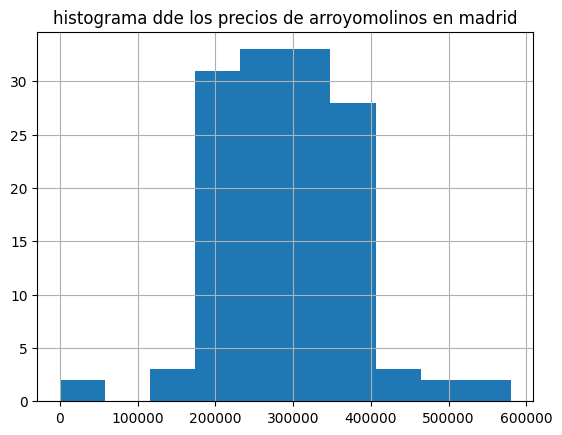

In [57]:
df[df["level5"]=="Arroyomolinos (Madrid)"]["price"].hist()
plt.title("histograma dde los precios de arroyomolinos en madrid")
plt.show()


# 9 58



Exercise 10. Are the average prices per square meter (price/m2) of "Valdemorillo" and "Galapagar" the same? (★★☆)

Print both average prices and then write a conclusion about it.

Hint: Create a new column called pps (price per square meter) and then analyze the values.

# TODO



In [58]:
city1 = "Valdemorillo"
city2 = "Galapagar"
pps_valdemorillo = df.assign(price_per_area=df["price"]/df["surface"]).query("level5==@city1")["price_per_area"].mean()
pps_galapagar= df.assign(price_per_area=df["price"]/df["surface"]).query("level5==@city2")["price_per_area"].mean()
print(f"el precio promedio de galapagar es{pps_galapagar:.1f}y el precio de valdemorillo es {pps_valdemorillo:.1f}")

el precio promedio de galapagar es1606.3y el precio de valdemorillo es 1318.0



Exercise 11. Analyze the relation between the surface and the price of the houses (★★☆)

Hint: You can make a scatter plot, then write a conclusion about it.


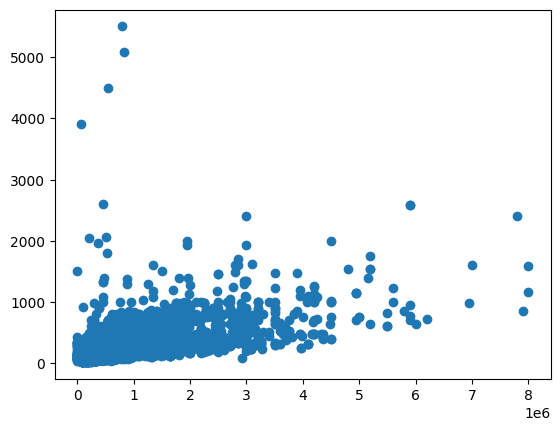

In [59]:
plt.scatter(df[df["surface"]<10000]["price"],df[df["surface"]<10000]["surface"])
plt.show()

Exercise 13. Which is the population (level5 column) that contains the most houses? (★★☆)

Print both the population and the number of houses.


In [60]:
df.groupby(by="level5").size().sort_values(ascending=False)

level5
 Madrid Capital         6643
Alcalá de Henares        525
Las Rozas de Madrid      383
Móstoles                 325
Getafe                   290
                        ... 
Montejo de la Sierra       1
Lozoya                     1
Pinilla del Valle          1
Rascafría                  1
Piñuécar-gandullas         1
Length: 168, dtype: int64


Exercise 21. Make a plot of the coordinates (latitude and longitude columns) of the south belt of Madrid by color of each population (you must use the subset obtained in Exercise 14) (★★★★)

Execute the following cell, and then start coding in the next one. You must implement a simple code that transforms the coordinates columns in a Python dictionary (add more information if needed) and then add it to the map


In [61]:
new_df = df[df["level5"].isin(["Fuenlabrada", "Leganés", "Getafe", "Alcorcón"])]
new_df

,id_realestates,isnew,realestate_name,phone_realestate,url_inmueble,rooms,bathrooms,surface,price,date,...,level2,level3,level4,level5,level6,level7,level8,upperlevel,latitude,longitude
1,153867863,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,NaN,89000,2019-12-28 18:27:15.997502700+00:00,...,Madrid,Zona Sur de Madrid,"Fuenlabrada, Zona de",Fuenlabrada,NaN,Centro,NaN,Centro,40.286740,-3.793510
3,152776331,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,86.0,89000,2019-12-28 18:27:15.997502700+00:00,...,Madrid,Zona Sur de Madrid,"Fuenlabrada, Zona de",Fuenlabrada,NaN,Centro,NaN,Centro,40.285379,-3.795081
85,153152077,False,sinergical inmobiliaria,NaN,https://www.fotocasa.es/es/comprar/vivienda/le...,1.0,1.0,50.0,107000,2019-12-28 18:30:53.960102+00:00,...,Madrid,Zona Suroeste,"Alcorcón, Zona de",Alcorcón,NaN,Centro,Casco Antiguo,Casco Antiguo,40.350590,-3.826930
94,153995577,False,viviendas365com,911226014.0,https://www.fotocasa.es/es/comprar/vivienda/le...,3.0,2.0,120.0,320000,2019-12-28 18:30:53.960102+00:00,...,Madrid,Zona Sur de Madrid,"Leganés, Zona de",Leganés,NaN,Valdepelayo - Montepinos - Arroyo Culebro,NaN,Valdepelayo - Montepinos - Arroyo Culebro,40.319330,-3.775740
109,153586414,False,area uno asesores inmobiliarios,912664081.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,3.0,142.0,425000,2019-12-28 18:32:32.533794200+00:00,...,Madrid,Zona Suroeste,"Alcorcón, Zona de",Alcorcón,NaN,Prado Santo Domingo - Ensanche,NaN,Prado Santo Domingo - Ensanche,40.331341,-3.831387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15275,153903887,False,aliseda servicios de gestion inmobiliaria,911368198.0,https://www.fotocasa.es/es/comprar/vivienda/al...,3.0,1.0,78.0,138000,NaT,...,Madrid,Zona Sur de Madrid,"Fuenlabrada, Zona de",Fuenlabrada,NaN,Loranca,NaN,Loranca,40.313810,-3.837330
15291,151697757,False,unipiso,912788631.0,https://www.fotocasa.es/es/comprar/vivienda/al...,3.0,2.0,110.0,279000,NaT,...,Madrid,Zona Sur de Madrid,"Leganés, Zona de",Leganés,NaN,Centro de Leganés,NaN,Centro de Leganés,40.325905,-3.763180
15305,153902389,False,jadein ferrero,914871639.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,85.0,170000,NaT,...,Madrid,Zona Sur de Madrid,"Fuenlabrada, Zona de",Fuenlabrada,NaN,Fuenlabrada II - El Molino,NaN,Fuenlabrada II - El Molino,40.288219,-3.809862
15322,153871864,False,gestion comercial,911220662.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,91.0,112000,NaT,...,Madrid,Zona Sur de Madrid,"Fuenlabrada, Zona de",Fuenlabrada,NaN,Centro,NaN,Centro,40.282820,-3.788920


In [44]:
from ipyleaflet import Map, basemaps, Marker
map = Map(center=(40.35,-3.8), zoom=11.5,basemap=basemaps.OpenStreetMap.Mapnik)
marker = Marker(Location=(new_df["latitude"],new_df["longitude"]))
for  index,row in new_df.iterrows():
    lat = row["latitude"]
    lon = row["longitude"]
    marker = Marker(location=(lat,lon))
    map.add(marker)
map


Map(center=[40.35, -3.8], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_ou…

## **conclusiones**
- conclucion 1
- conclucion 2
- conclucion 3